<a href="https://colab.research.google.com/github/kimujinu/Machine-learning/blob/main/%EC%95%99%EC%83%81%EB%B8%94(Ensemble).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [44]:
from sklearn.datasets import load_iris,load_wine,load_breast_cancer,load_diabetes,load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [8]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [9]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [14]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0020646095275878907 (+/- 0.00022985888595739536)
avg score time: 0.0032362937927246094 (+/- 0.00024327052307247153)
avg test score: 0.96 (+/- 0.024944382578492935)


In [15]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.024142026901245117 (+/- 0.0036438528394420145)
avg score time: 0.00873265266418457 (+/- 0.0012400021494611035)
avg test score: 0.9533333333333334 (+/- 0.02666666666666666)


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [17]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0017822265625 (+/- 0.0007095005459631991)
avg score time: 0.0028139591217041016 (+/- 0.0008411686242818977)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [18]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.03994808197021484 (+/- 0.010212427473825659)
avg score time: 0.01268768310546875 (+/- 0.0020559281461878455)
avg test score: 0.9550793650793651 (+/- 0.0136876578649588)


##### 유방암 데이터

In [19]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [20]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.00713052749633789 (+/- 0.004531389494559513)
avg score time: 0.031141185760498048 (+/- 0.01632573003381464)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [21]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.024706268310546876 (+/- 0.0027298212608410297)
avg score time: 0.014948272705078125 (+/- 0.0003518001532138477)
avg test score: 0.9543393882937432 (+/- 0.016023485046730065)


#### SVC

##### 붓꽃 데이터

In [22]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [23]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0024876117706298826 (+/- 0.0012018383824976273)
avg score time: 0.0006836414337158203 (+/- 0.00012271630083314687)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [25]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.029929399490356445 (+/- 0.0031408892172259976)
avg score time: 0.004035329818725586 (+/- 0.0003391431202628974)
avg test score: 0.96 (+/- 0.024944382578492935)


##### 와인 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.002767801284790039 (+/- 0.001547723392635066)
avg score time: 0.0009202003479003906 (+/- 0.0005163317857811203)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [28]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.030518436431884767 (+/- 0.001616776620231892)
avg score time: 0.004496097564697266 (+/- 0.00018459437429642713)
avg test score: 0.9328571428571429 (+/- 0.03790162439488878)


##### 유방암 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [30]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.007233762741088867 (+/- 0.0025010715809997)
avg score time: 0.0019231796264648437 (+/- 0.00011550877966657703)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [31]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.04356122016906738 (+/- 0.0025991710595436265)
avg score time: 0.011040067672729493 (+/- 0.002330565718796862)
avg test score: 0.9700978108989287 (+/- 0.009067951824315095)


#### Decision Tree

##### 붓꽃 데이터

In [32]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [33]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0023202419281005858 (+/- 0.0016936959135725519)
avg score time: 0.00048508644104003904 (+/- 8.420714702481064e-05)
avg test score: 0.9600000000000002 (+/- 0.03265986323710903)


In [34]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.038323831558227536 (+/- 0.007054150763669494)
avg score time: 0.003797149658203125 (+/- 0.0009844973856110433)
avg test score: 0.9400000000000001 (+/- 0.04898979485566354)


##### 와인 데이터

In [35]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [36]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0020169734954833983 (+/- 0.0005285414878030425)
avg score time: 0.0007305622100830078 (+/- 0.0006160052419527505)
avg test score: 0.882063492063492 (+/- 0.03248970222730342)


In [37]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.048717164993286134 (+/- 0.005350441730478975)
avg score time: 0.0046557426452636715 (+/- 0.00019448986493329775)
avg test score: 0.922063492063492 (+/- 0.10145378130207267)


##### 유방암 데이터

In [38]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [39]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.018874406814575195 (+/- 0.008837325097805366)
avg score time: 0.0009709358215332031 (+/- 0.00014075241079769164)
avg test score: 0.9173575531749728 (+/- 0.018300034495311604)


In [41]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.06287012100219727 (+/- 0.004815802960819747)
avg score time: 0.005465412139892578 (+/- 0.0008632810700271613)
avg test score: 0.9578171091445427 (+/- 0.01510161814346752)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [45]:
boston = load_boston()
diabetes = load_diabetes()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

#### KNN

##### 보스턴 주택 가격 데이터

In [49]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [50]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0018101215362548828 (+/- 0.0008606988425709653)
avg score time: 0.0017401218414306641 (+/- 0.0004508976706391195)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [51]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.02156071662902832 (+/- 0.002998519839228184)
avg score time: 0.009858989715576172 (+/- 0.0006013173431367279)
avg test score: 0.4373796274446722 (+/- 0.1271458418948375)


##### 당뇨병 데이터

In [52]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [53]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.001737213134765625 (+/- 0.0005764937302166598)
avg score time: 0.0021549224853515624 (+/- 0.00048408170586919293)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [54]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.020468378067016603 (+/- 0.001979752343451195)
avg score time: 0.00889759063720703 (+/- 0.00014836636267719119)
avg test score: 0.3826042839490654 (+/- 0.07117310115129925)


#### SVR

##### 보스턴 주택 가격 데이터

In [55]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [56]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.021424055099487305 (+/- 0.015214128829808644)
avg score time: 0.004116439819335937 (+/- 0.0010682118384918854)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [57]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.07052321434020996 (+/- 0.030580022675696275)
avg score time: 0.020155954360961913 (+/- 0.0061094910670771415)
avg test score: 0.12636102153944656 (+/- 0.30856551309462343)


##### 당뇨병 데이터

In [58]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [59]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.029915046691894532 (+/- 0.014576498544863042)
avg score time: 0.006629467010498047 (+/- 0.0020341677168479975)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


In [60]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.042207860946655275 (+/- 0.004292602881833687)
avg score time: 0.01277022361755371 (+/- 0.0005867092521933238)
avg test score: 0.06641468032808677 (+/- 0.030949076523192752)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [61]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [62]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.0067770957946777345 (+/- 0.0007928415235707085)
avg score time: 0.000980377197265625 (+/- 9.934899616447098e-05)
avg test score: 0.047413710328529216 (+/- 0.9544451491584948)


In [63]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.05505037307739258 (+/- 0.00666935488841663)
avg score time: 0.004637384414672851 (+/- 0.000486702705018449)
avg test score: 0.5560829411661226 (+/- 0.23759333130488403)


##### 당뇨병 데이터

In [64]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model,n_estimators=10,max_samples=0.5,max_features=0.5)

In [65]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.003843259811401367 (+/- 0.0013376713521475526)
avg score time: 0.0005595684051513672 (+/- 5.722244577137528e-05)
avg test score: -0.15624698791730302 (+/- 0.12509763084038894)


In [66]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.03170523643493652 (+/- 0.0026683294725572157)
avg score time: 0.002910804748535156 (+/- 0.0002808267418315611)
avg test score: 0.3752051424877476 (+/- 0.06432226143241676)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [67]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [68]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [70]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.20728797912597657 (+/- 0.09213599864751161)
avg score time: 0.015032052993774414 (+/- 0.006622947991696905)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [71]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.2541624069213867 (+/- 0.027696138918732616)
avg score time: 0.021750116348266603 (+/- 0.005022856725341406)
avg test score: 0.9665079365079364 (+/- 0.020746948644437477)


In [72]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.28337411880493163 (+/- 0.06098767842596553)
avg score time: 0.014789104461669922 (+/- 0.004760125153471821)
avg test score: 0.9613569321533924 (+/- 0.017156346386576565)


### Random Forests 회귀

In [73]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [74]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.432789945602417 (+/- 0.10525023711644972)
avg score time: 0.012910604476928711 (+/- 0.003545037740743911)
avg test score: 0.6442122448959771 (+/- 0.18596756576104057)


In [75]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.5182021141052247 (+/- 0.22248188915118416)
avg score time: 0.018042469024658205 (+/- 0.012193115269378095)
avg test score: 0.4143256934297538 (+/- 0.05037481139168299)


### Extremely Randomized Trees 분류

In [76]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [77]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.17716898918151855 (+/- 0.006372563329175366)
avg score time: 0.018981504440307616 (+/- 0.0008321900746914683)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [78]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.22952799797058104 (+/- 0.06550384067740762)
avg score time: 0.02263169288635254 (+/- 0.006139410827467931)
avg test score: 0.9774603174603176 (+/- 0.011275428974716221)


In [79]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.2286306858062744 (+/- 0.037831352117453636)
avg score time: 0.020541810989379884 (+/- 0.0007554168065815976)
avg test score: 0.9648501785437045 (+/- 0.00784683560358965)


### Extremely Randomized Trees 회귀

In [80]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [81]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.3629593372344971 (+/- 0.11775141042027237)
avg score time: 0.01831974983215332 (+/- 0.001514763562195906)
avg test score: 0.6164976099684571 (+/- 0.2666654044326473)


In [82]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.25980334281921386 (+/- 0.14286890154997928)
avg score time: 0.016421794891357422 (+/- 0.011652802353792022)
avg test score: 0.4388951211066138 (+/- 0.03189801412108793)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [83]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [84]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser =0.5
RANDOM_SEED = 13

In [85]:
iris  = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

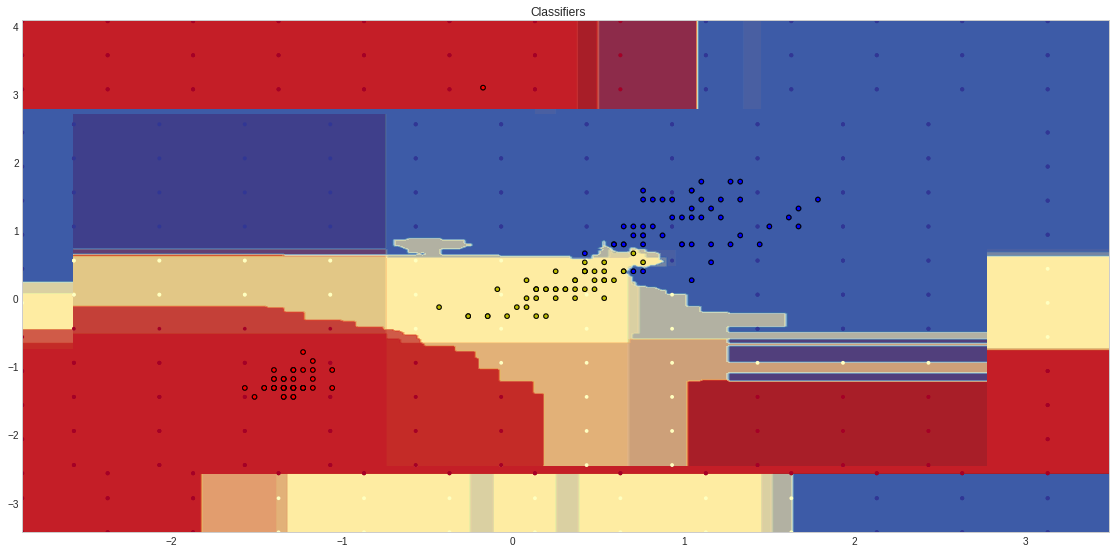

In [100]:
plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):

  for model in models:
    
    X = iris.data[:,pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis=0)
    X = (X-mean)/std

    model.fit(X,y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
    if plot_idx < 10:
      plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title,fontsize=9)
    
    x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                        np.arange(y_min,y_max,plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx,yy,Z,cmap=cmap)
    else:
      estimator_alpha = 1.0/len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx,yy,Z,alpha = estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min,x_max,plot_step_coarser),
                                         np.arange(y_min,y_max,plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    
    cs_point = plt.scatter(xx_coarser,yy_coarser,s=15,
                           c=Z_points_coarser,cmap=cmap,
                           edgecolor='none')
    
    plt.scatter(X[:,0],X[:,1],c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k',s=20)
    plot_idx += 1

plt.suptitle('Classifiers',fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

In [102]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

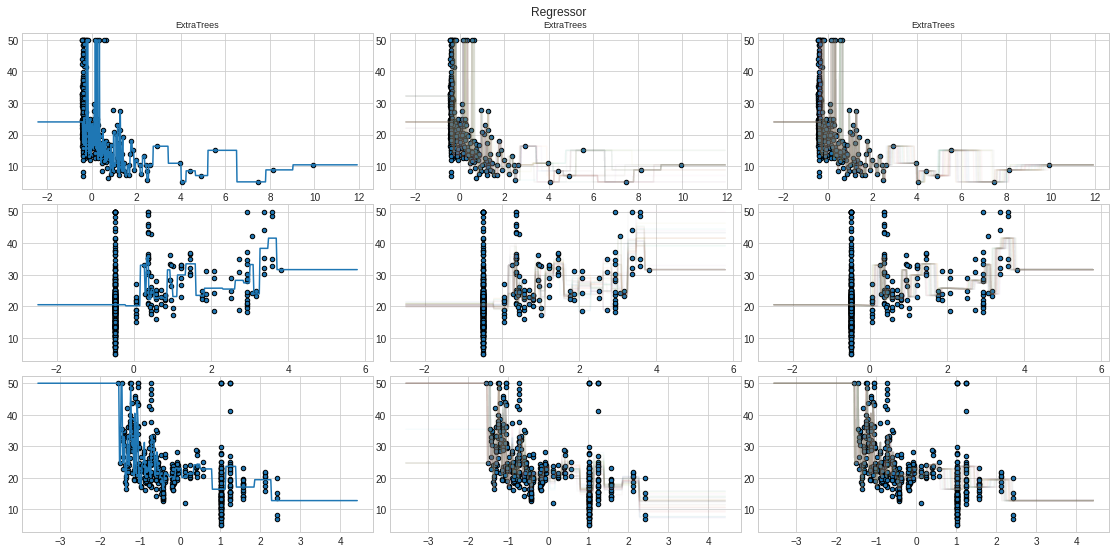

In [103]:
plt.figure(figsize=(16,8))

for pair in (0,1,2):

  for model in models:
    X = boston.data[:,pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X-mean)/std

    model.fit(X.reshape(-1,1),y)

    model.title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title,fontsize = 9)
    
    x_min,x_max = X.min()-1,X.max()+1
    y_min,y_max = y.min()-1,y.max()+1
    xx,yy = np.arange(x_min-1,x_max+1,plot_step),np.arange(y_min-1,y_max+1,plot_step)

    if isinstance(model,DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx,Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
        cs = plt.plot(xx,Z,alpha=estimator_alpha)
      
    plt.scatter(X,y,edgecolors='k',s=20)
    plot_idx += 1
  

plt.suptitle('Regressor',fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [104]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [105]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [106]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.11904559135437012 (+/- 0.0072171953963592415)
avg score time: 0.016369390487670898 (+/- 0.006885736819932586)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [108]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.24551210403442383 (+/- 0.045334207593922336)
avg score time: 0.03436436653137207 (+/- 0.015436975944038223)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [109]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.28219213485717776 (+/- 0.05151603427846851)
avg score time: 0.015424680709838868 (+/- 0.00043178399572106624)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [110]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [111]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.1625913143157959 (+/- 0.0066467120873823565)
avg score time: 0.008217287063598634 (+/- 0.0004085606441807041)
avg test score: 0.5736158247251903 (+/- 0.2318290404486307)


In [112]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.07065529823303222 (+/- 0.01994175213969362)
avg score time: 0.0036269187927246093 (+/- 0.0009458976484845703)
avg test score: 0.428555219886759 (+/- 0.04273518486015783)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [113]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [116]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [117]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.21858611106872558 (+/- 0.009019078632011127)
avg score time: 0.0013539314270019532 (+/- 8.649034789883671e-05)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [118]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data,y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.5471991062164306 (+/- 0.029334710231189248)
avg score time: 0.002040719985961914 (+/- 7.58831468312983e-05)
avg test score: 0.9330158730158731 (+/- 0.04127777701479872)


In [119]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data,y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.43094382286071775 (+/- 0.005674271009017253)
avg score time: 0.0011425018310546875 (+/- 4.737275774772565e-05)
avg test score: 0.9631268436578171 (+/- 0.021024240542234)


### Gradient Tree Boosting 회귀

In [120]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [121]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.17938241958618165 (+/- 0.004945816934479563)
avg score time: 0.0013797760009765625 (+/- 5.49020372863823e-05)
avg test score: 0.6737600689366179 (+/- 0.16652623935536764)


In [122]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data,y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.20897278785705567 (+/- 0.05139668737726697)
avg score time: 0.0014959812164306641 (+/- 3.365119252315518e-05)
avg test score: 0.40771104599268215 (+/- 0.07067980886431041)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [124]:
from sklearn.ensemble import VotingClassifier,VotingRegressor,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [125]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc',model1),('navie',model2),('forest',model3)],
    voting='hard'
)

In [127]:
for model in (model1,model2,model3,vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model,iris.data,iris.target,cv=5)
  print("Accuracy: %0.2f (+/- %0.2f [%s]"%(scores.mean(),scores.std(),model_name))

Accuracy: 0.97 (+/- 0.02 [SVC]
Accuracy: 0.95 (+/- 0.03 [GaussianNB]
Accuracy: 0.96 (+/- 0.02 [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02 [VotingClassifier]


In [128]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc',model1),('navie',model2),('forest',model3)],
    voting='soft',
    weights=[2,1,2]
)

In [129]:
for model in (model1,model2,model3,vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model,iris.data,iris.target,cv=5)
  print("Accuracy: %0.2f (+/- %0.2f [%s]"%(scores.mean(),scores.std(),model_name))

Accuracy: 0.97 (+/- 0.02 [SVC]
Accuracy: 0.95 (+/- 0.03 [GaussianNB]
Accuracy: 0.96 (+/- 0.02 [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02 [VotingClassifier]


### 결정 경계 시각화

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [132]:
X = iris.data[:,[0,2]]
y = iris.target

In [133]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1,kernel='rbf',probability=True)
vote_model = VotingClassifier(estimators=[('dt',model1),('knn',model2),('svc',model3)],
                              voting='soft',weights=[2,1,2])

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [134]:
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),
                    np.arange(y_min,y_max,0.1))

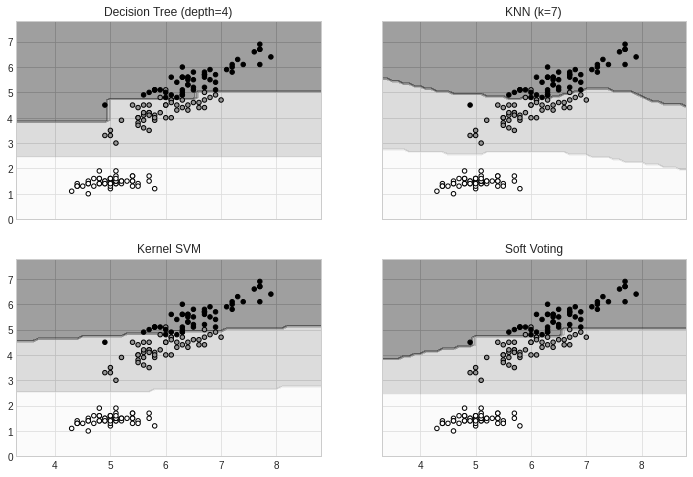

In [135]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1,model2,model3,vote_model],
                          ["Decision Tree (depth=4)", 'KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.4)
  axarr[idx[0],idx[1]].scatter(X[:,0],X[:,1],c=y,s=20,edgecolor='k')
  axarr[idx[0],idx[1]].set_title(tt)

plt.show()
  

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

In [138]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('LinearRegression',model1),('GradientBoostingRegressor',model2),('RandomForestRegressor',model3)],
    weights=[1,1,1]
)

In [139]:
for model in (model1,model2,model3,vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model,boston.data,boston.target,cv=5)
  print("R2: %0.2f (+/- %0.2f [%s]"%(scores.mean(),scores.std(),model_name))

R2: 0.35 (+/- 0.38 [LinearRegression]
R2: 0.68 (+/- 0.16 [GradientBoostingRegressor]
R2: 0.61 (+/- 0.23 [RandomForestRegressor]
R2: 0.66 (+/- 0.20 [VotingRegressor]


### 회귀식 시각화

In [140]:
X = boston.data[:,0].reshape(-1,1)
y = boston.target

In [142]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('LinearRegression',model1),('GradientBoostingRegressor',model2),('RandomForestRegressor',model3)],
    weights=[1,1,1]
)
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)


In [143]:
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
xx = np.arange(x_min-1,x_max+1,0.1)

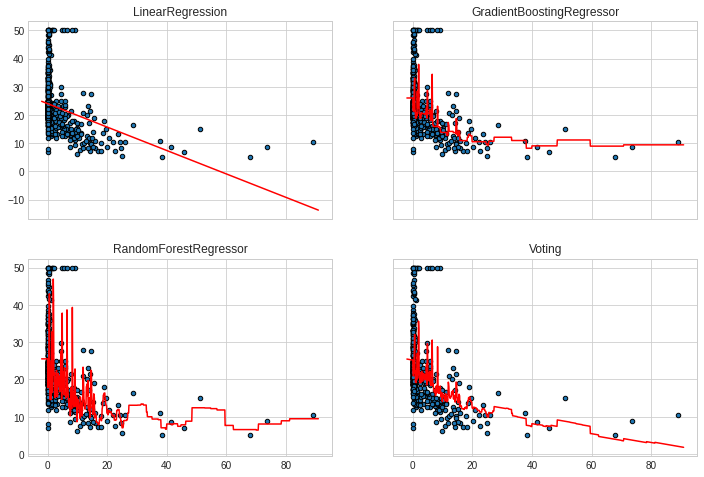

In [144]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1,model2,model3,vote_model],
                          ["LinearRegression", 'GradientBoostingRegressor',
                           'RandomForestRegressor', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))


  axarr[idx[0],idx[1]].plot(xx,Z,c='r')
  axarr[idx[0],idx[1]].scatter(X,y,s=20,edgecolor='k')
  axarr[idx[0],idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [145]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor

In [146]:
estimators = [('ridge',Ridge()),
              ('lasso',Lasso()),
              ('svr',SVR())]

In [147]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [149]:
cross_val = cross_validate(
    estimator=reg,
    X=boston.data,y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.24650826454162597 (+/- 0.007704695153656717)
avg score time: 0.007128477096557617 (+/- 0.0001260240105285884)
avg test score: 0.3217211771351089 (+/- 0.33534342097848735)


#### 회귀식 시각화

In [ ]:
X = boston.data[:,0].reshape(-1,1)
y = boston.target

In [151]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg_model = reg.fit(X,y)

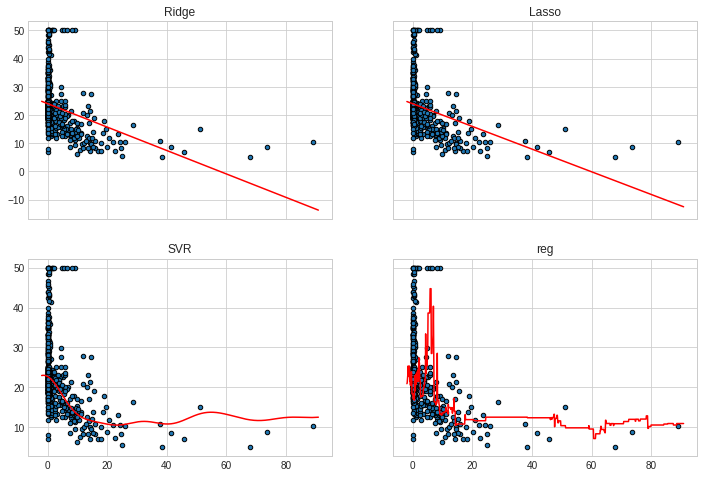

In [152]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1,model2,model3,reg_model],
                          ["Ridge", 'Lasso',
                           'SVR', 'reg']):
  Z = model.predict(xx.reshape(-1,1))


  axarr[idx[0],idx[1]].plot(xx,Z,c='r')
  axarr[idx[0],idx[1]].scatter(X,y,s=20,edgecolor='k')
  axarr[idx[0],idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,StackingClassifier

In [154]:
estimators = [('logistic',LogisticRegression(max_iter=10000)),
              ('svc',SVC()),
              ('navie',GaussianNB())]

In [155]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [156]:
cross_val = cross_validate(
    estimator=clf,
    X=iris.data,y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.5720314025878906 (+/- 0.03683791855664782)
avg score time: 0.023945426940917967 (+/- 0.0029525998356974754)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


#### 결정 경계 시각화

In [157]:
X = iris.data[:,[0,2]]
y = iris.target

In [158]:
model1 = LogisticRegression(max_iter=10000)
model2 = GaussianNB()
model3 = SVC()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

In [159]:
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),
                    np.arange(y_min,y_max,0.1))

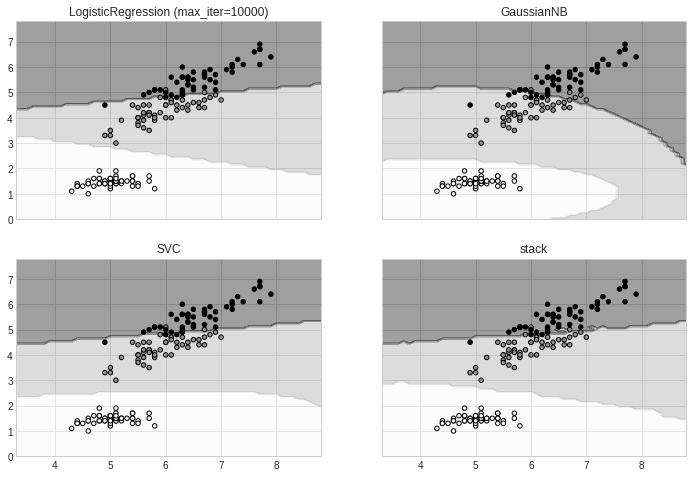

In [161]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1,model2,model3,stack],
                          ["LogisticRegression (max_iter=10000)", 'GaussianNB',
                           'SVC', 'stack']):
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.4)
  axarr[idx[0],idx[1]].scatter(X[:,0],X[:,1],c=y,s=20,edgecolor='k')
  axarr[idx[0],idx[1]].set_title(tt)

plt.show()
  